## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [112]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split


columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
boston = pd.read_csv("boston.txt", sep="\s+", skiprows=22, header=None)
even_lines = boston.loc[boston.index % 2 == 0].reset_index(drop=True)
odd_lines = boston.loc[boston.index % 2 == 1].drop([3, 4, 5, 6, 7, 8, 9, 10], axis=1).reset_index(drop=True)

boston = even_lines.merge(odd_lines, how="left", left_index=True, right_index=True)
boston.columns = columns
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [113]:
X = pd.DataFrame(boston, columns =  ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])


In [114]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [115]:
y = pd.DataFrame(boston, columns = ['MEDV'])
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [117]:
regr_1 = DecisionTreeRegressor(random_state=0)

regr_1.fit(X_train, y_train)

mse1 = regr_1.score(X_test, y_test)
mse1

0.42824835782082915

n_minimo,2,3,4,5,6,7,8,9
profundidade,,,,,,,,
2,0.556479,0.556479,0.556479,0.556479,0.556479,0.556479,0.556479,0.556479
3,0.526210,0.673678,0.673678,0.666803,0.665019,0.660409,0.669146,0.669146
4,0.603701,0.681388,0.665196,0.650757,0.657315,0.674402,0.685759,0.684468
5,0.605015,0.680939,0.669279,0.672416,0.676123,0.687915,0.699006,0.693811
6,0.539630,0.653184,0.658463,0.674171,0.680776,0.694496,0.694147,0.689009
7,0.539468,0.666189,0.667015,0.675222,0.683890,0.701234,0.709230,0.693630
8,0.590681,0.658958,0.659828,0.669121,0.689996,0.702559,0.701026,0.695243
9,0.548642,0.644111,0.646399,0.666434,0.689216,0.699784,0.710876,0.693573


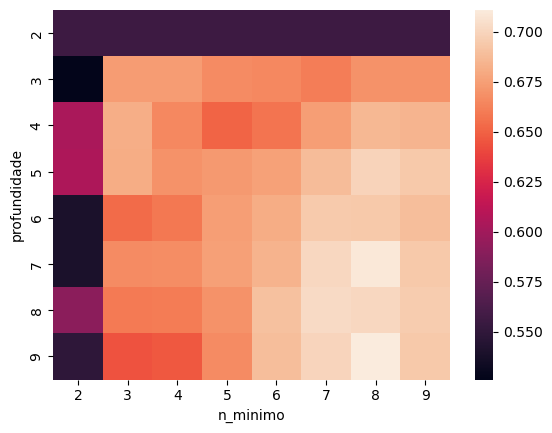

In [118]:
mses = []
ind_i = []
ind_j = []

for i in range(2, 10):
    for j in range(2, 10):
        regr_1 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_1.fit(X_train, y_train)
        mse1 = regr_1.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)
        
df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo':ind_j})
sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

In [119]:
y_1 = regr_1.predict(X_test)
y_1

array([22.43636364, 26.4       , 48.6       , 19.40666667, 32.13333333,
       43.81666667, 21.93      ,  8.83      , 20.25625   , 30.775     ,
       21.93      , 21.08888889, 12.24      , 30.63333333, 19.39166667,
       20.75833333, 20.75833333, 48.6       , 19.39166667, 15.98      ,
       15.5       , 22.43636364, 35.50833333, 48.6       , 32.13333333,
       21.27777778, 13.9       , 21.08888889, 21.08888889, 21.27777778,
       24.43333333, 32.13333333, 13.9       , 22.43636364, 24.62142857,
       30.775     , 24.43333333, 13.9       , 19.39166667, 43.81666667,
       26.4       , 20.25625   , 19.40666667, 48.6       , 20.25625   ,
       21.93      , 18.38      , 24.43333333, 19.39166667, 30.775     ,
       32.13333333, 22.46      , 18.38      ,  8.83      , 20.75833333,
       17.33333333, 15.25555556,  8.83      , 35.50833333, 11.11333333,
       20.03333333, 18.38      , 15.5       , 19.40666667, 20.75833333,
       21.93      , 21.93      , 21.27777778, 22.44      , 32.13

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [120]:
path = regr_1.cost_complexity_pruning_path(X_train, y_train)
path = pd.DataFrame(path)
path

,ccp_alphas,impurities
0,0.000000,9.520635
1,0.018388,9.539022
2,0.022741,9.561763
3,0.032137,9.593900
4,0.032488,9.626388
5,0.055228,9.681617
6,0.057491,9.739107
7,0.062671,9.864449
8,0.081468,9.945917
9,0.082537,10.028455


As últimas linhas foram excluídas, pois possuem ccp_alphas maiores que 1 o que pode gerar ruído nos dados

In [106]:
path_dropped = path.iloc[:-6]
path_dropped

,ccp_alphas,impurities
0,0.000000,9.520635
1,0.018388,9.539022
2,0.022741,9.561763
3,0.032137,9.593900
4,0.032488,9.626388
5,0.055228,9.681617
6,0.057491,9.739107
7,0.062671,9.864449
8,0.081468,9.945917
9,0.082537,10.028455


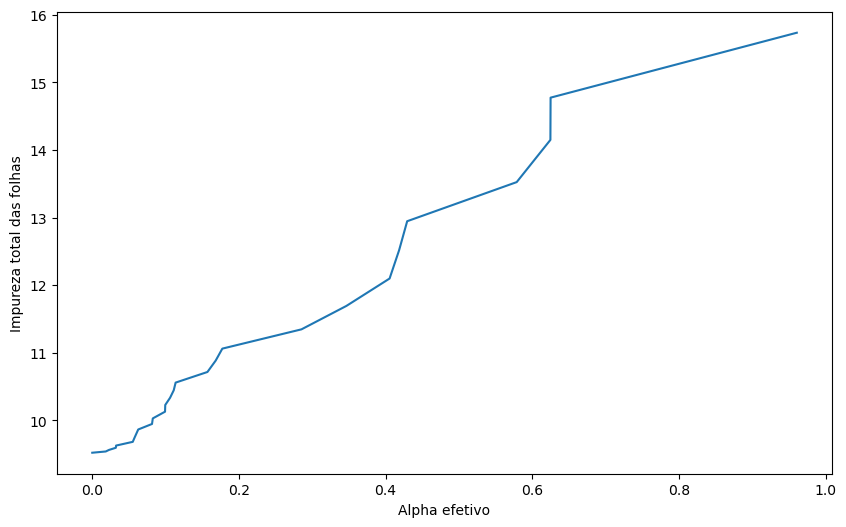

In [121]:
ccp_alphas, impurities = path_dropped.ccp_alphas, path_dropped.impurities
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas");

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [122]:
#Guarda em uma lista todas as árvores possíveis para cada ccp alpha
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [123]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]#para cada árvore da lista clf calcula o MSE para base de treino
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]#para cada árvore da lista clf calcula o MSE para base de teste

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

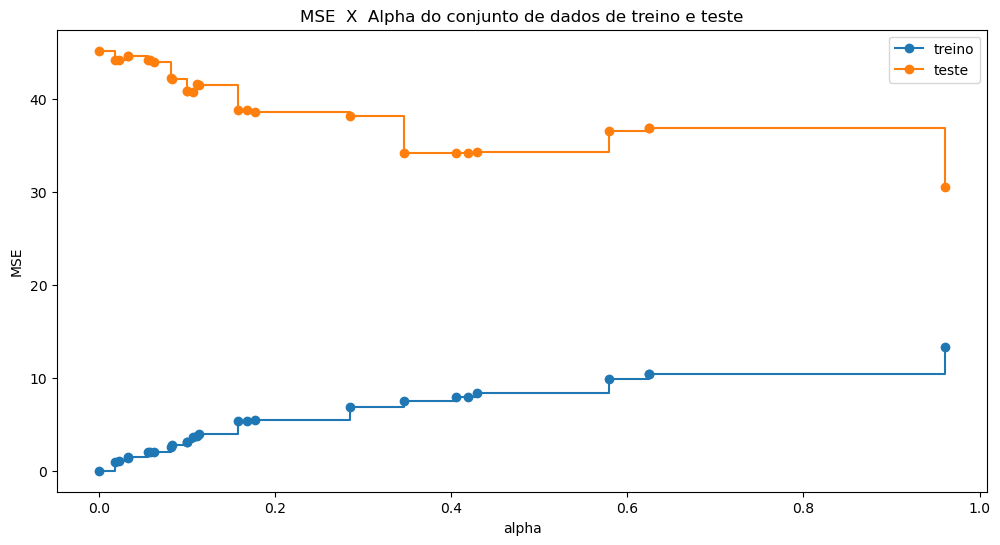

In [124]:
fig, ax = plt.subplots(figsize=(12,6))

ax.set_xlabel(xlabel='alpha')
ax.set_ylabel(ylabel='MSE')
ax.set_title(label='MSE  X  Alpha do conjunto de dados de treino e teste')

ax.plot(ccp_alphas, train_scores, 
        marker='o', label='treino', drawstyle='steps-post')

ax.plot(ccp_alphas, test_scores, 
        marker='o', label='teste', drawstyle='steps-post')

ax.legend()

plt.show()

O valor de alpha perto do ponto de mínimo do MSE seria cerca de 0.5

In [125]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=0.5)
arvore_final.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.5, random_state=0)

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [126]:
print(f"R-quadrado na base testes : {arvore_final.score(X_test, y_test):2f}")

R-quadrado na base testes : 0.543241


### 7. Visualize esta árvore.

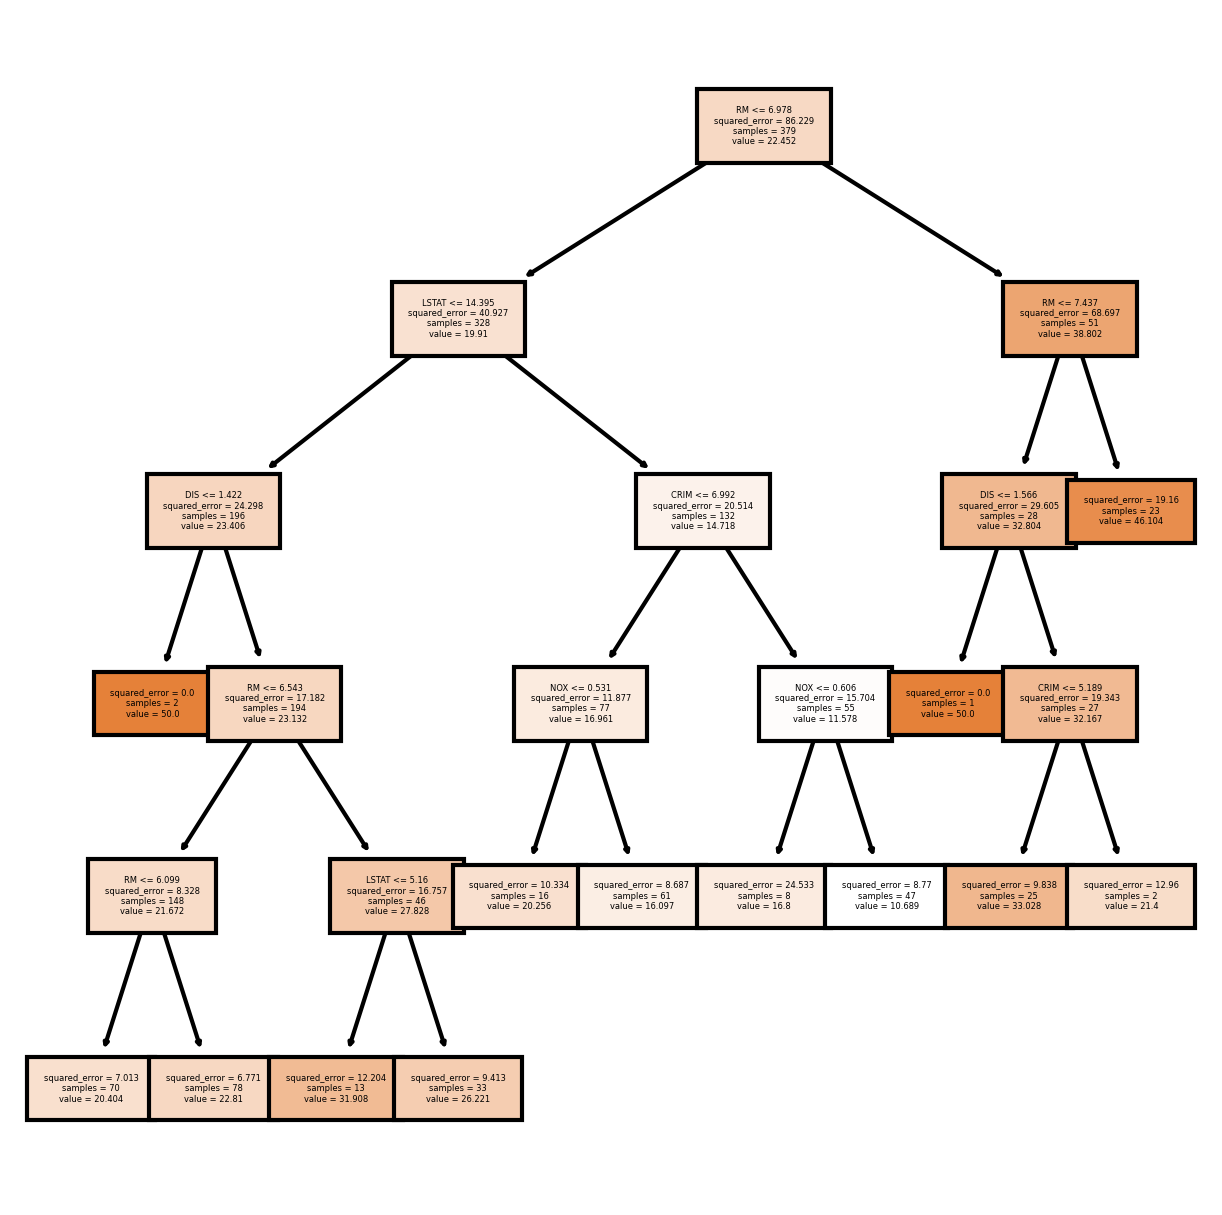

In [159]:
fig, axes = plt.subplots(figsize = (5,5), dpi=300)
tree.plot_tree(arvore_final,
               feature_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
               filled=True, fontsize=2);